# Animal Classifer

Dan Cersosimo | Data Scientist | k-NN Modeling

# Contextualization

This project has a rather organic inspiration. I was watching an animal documentary with my girlfriend where they depict a myriad of animals from across the different classes (mammals, birds, reptiles, etc.). The following day, I was in one of my University courses where the topic of discussion was machine learning alongside a handful of techniques. I realized I could apply one of these to build a tool that can classify animals into their respective classes based on the presence of certain features. Following the class, I got to work and found a dataset on Kaggle that exhibits the components that I had sought. This dataset has instances of unique animals with a handful of features depicting whether or not an animal exhibits a particular trait. The final feature is a column that states the class of said animal; perfect to serve as the target variable. By working with this data, my goal is to develop a tool to take in user input for each of the features and predict the class of a hypothetical animal. The input will be binary to indicate the presence or lack thereof of a particular feature. This data will be prepared and explored from which I will employ k-NN to build a model that can be harnessed to provide functionality for the tool described above.

# Data Acquisition and Loading 

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp

#This is to load the data
file_path_class = 'C:\\Users\\dcers\\Downloads\\Animal_Class\\class.csv'

df_class = pd.read_csv(file_path_class)

df_class.head()

C:\Users\dcers\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dcers\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\dcers\AppData\Local\Temp/ipykernel_1252/3845178838.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\dcers\anaconda3\l

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [2]:
file_path_zoo = 'C:\\Users\\dcers\\Downloads\\Animal_Class\\zoo.csv'

df_zoo = pd.read_csv(file_path_zoo)

df_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Data Preprocessing and EDA

In [3]:
#This is to learn the amount of classes which are included in the data
df_class['Class_Type'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

In [4]:
#This is to remove the catsize feature as this is not a standard trait used to differntiate animals
df_zoo = df_zoo.drop('catsize', axis=1)

In [5]:
df_zoo.isnull()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,class_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
#check for nulls, this essentially shows that there are no nulls across the entire dataset
count_true = 0
count_false = 0
for i in df_zoo.isnull():
    for index in df_zoo[i].isnull():
        if index == True:
            count_true += 1
        elif index == False:
            count_false += 1
    print(i, count_true)
    print(i, count_false)
    count_true = 0
    count_false = 0

animal_name 0
animal_name 101
hair 0
hair 101
feathers 0
feathers 101
eggs 0
eggs 101
milk 0
milk 101
airborne 0
airborne 101
aquatic 0
aquatic 101
predator 0
predator 101
toothed 0
toothed 101
backbone 0
backbone 101
breathes 0
breathes 101
venomous 0
venomous 101
fins 0
fins 101
legs 0
legs 101
tail 0
tail 101
domestic 0
domestic 101
class_type 0
class_type 101


In [7]:
#Show the numebr of unqiue values in each column. Notice legs is not in the binary nature of the others. 
#On first thought this likely reflects the magnitude of the legs for each animal. 
#Introduces issue of consistency with measurment.
df_zoo.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
class_type       7
dtype: int64

In order to properly evaluate the data via k-NN, the method of measuring these features should be consistent. As a result, the goal is to keep the features binary with a yes or no to indicate the presence of a trait. If we leave the quantity of the feature for the legs column, then the additional characteristics should reflect the variation in amount for the animals as well to keep consistency. This would effectively render this dataset unusable since it does not record these additional magnitudes. As I result I opt to convert it to binary in the following code.

In [8]:
#Find the instances which have a value larger then one and then interate over these to convert them to 1 to indicate presence
index = []
count = 0
for i in df_zoo['legs']:
    if i > 1:
        index.append(count)
    count += 1
print(index)

for i in index:
    df_zoo.at[i, 'legs'] = 1

[0, 1, 3, 4, 5, 6, 9, 10, 11, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 63, 64, 65, 67, 68, 69, 70, 71, 72, 75, 78, 79, 83, 84, 85, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 100]


In [9]:
#Display the number of unique terms again to show the legs converted state
df_zoo.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             2
tail             2
domestic         2
class_type       7
dtype: int64

In [10]:
#Show the unique values for the classes. Column uses 1-7 as oppossed to the class terms themselves
df_zoo['class_type'].unique()    

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [11]:
#View the other df to show the number to class association
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [12]:
#Implement this confirmed association to convert the class_type column in df_zoo to the mammals terms. 
#This is to allow for the later prediction to immediatley give the class term without needing conversion then
#In addition, it is more aesthetic
Class_Type = []
for i in df_zoo['class_type']:
    if i == 1:
        Class_Type.append('Mammal')
    if i == 2:
        Class_Type.append('Bird')
    if i == 3:
        Class_Type.append('Reptile')
    if i == 4:
        Class_Type.append('Fish')
    if i == 5:
        Class_Type.append('Amphibian')
    if i == 6:
        Class_Type.append('Bug')
    if i == 7:
        Class_Type.append('Invertebrate')
print(Class_Type)

df_zoo['class_type'] = Class_Type

['Mammal', 'Mammal', 'Fish', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Fish', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Invertebrate', 'Invertebrate', 'Invertebrate', 'Bird', 'Mammal', 'Fish', 'Mammal', 'Bird', 'Bird', 'Mammal', 'Bird', 'Bug', 'Amphibian', 'Amphibian', 'Mammal', 'Mammal', 'Mammal', 'Bug', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Fish', 'Bug', 'Bug', 'Bird', 'Bug', 'Bird', 'Mammal', 'Mammal', 'Invertebrate', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bug', 'Amphibian', 'Invertebrate', 'Mammal', 'Mammal', 'Bird', 'Bird', 'Bird', 'Bird', 'Fish', 'Fish', 'Reptile', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Bird', 'Invertebrate', 'Fish', 'Mammal', 'Mammal', 'Reptile', 'Invertebrate', 'Bird', 'Bird', 'Reptile', 'Invertebrate', 'Fish', 'Bird', 'Mammal', 'Invertebrate', 'Fish', 'Bird', 'Bug', 'Amphibian', 'Reptile', 'Reptile', 'Fish', 'Mammal', 'Mammal', 'Bird', 'Mammal', 'Bug', 'Mammal', 'Invertebrate', 'Bird']


In [13]:
#Show how the values have been converted
df_zoo['class_type']

0            Mammal
1            Mammal
2              Fish
3            Mammal
4            Mammal
           ...     
96           Mammal
97              Bug
98           Mammal
99     Invertebrate
100            Bird
Name: class_type, Length: 101, dtype: object

In [14]:
terms_list =[]
for i in df_zoo['class_type'].unique():
    terms_list.append(i)
terms_list

['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']

In [15]:
count_m = 0 
count_r = 0 
count_bi = 0 
count_bu = 0 
count_f = 0 
count_a = 0
count_i = 0 
for i in df_zoo['class_type']:
    if i == 'Mammal':
        count_m += 1
    if i == 'Reptile':
        count_r += 1
    if i == 'Bird':
        count_bi += 1
    if i == 'Bug':
        count_bu += 1
    if i == 'Fish':
        count_f += 1
    if i == 'Amphibian':
        count_a += 1
    if i == 'Invertebrate':
        count_i += 1
        
print(count_m, count_r, count_bi, count_bu, count_f, count_a, count_i)

41 5 20 8 13 4 10


# k-NN Modeling

In [16]:
#Here I import necessary functions
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#X is all columns aisde from animal names and classes. The class feature is the target variable, Y
X = df_zoo.iloc[:, 1:-1]
y = df_zoo['class_type']

#Here I split the data into training and testing sets using stratify to try an ensure consistent proprotionality in an effort to have 1 amphibian in the test data and 3 in the training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 50)

#This configures the amount of stratified folds, 3, and random shuffling to be applied to cross validation hyperparameter tuning to optimize k value
Folds_Balanced = StratifiedKFold(n_splits=3, shuffle=True, random_state=50)

# List to store the scores for each k value along with a range to test through
cv_scores = []
k_values = range(3, 21)

#This iterates through the listed k values and records their accuracy into the list
for i in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=Folds_Balanced.split(X_train, y_train), scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Here I find the optimal k value based on the best cross-validated accuracy
optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal k value: {optimal_k}")

# This trains the k-NN classifier with the optimal k value
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

#Predictions on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#This shows the results 
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Optimal k value: 4
Accuracy: 1.00

Confusion Matrix:
[[1 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0]
 [0 0 0 0 0 0 1]]

Classification Report:
              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         4
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00         8
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



# Confusion Matrix Visualization 

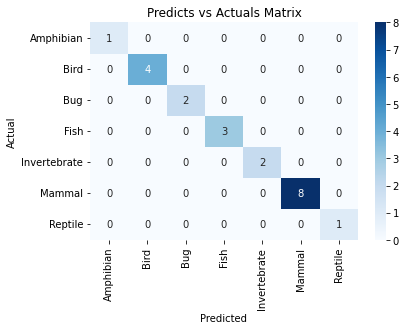

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#sort alphabetically since the confusion matrix arranges them as so. This aligns the labels with the correct values
sorted_terms = sorted(terms_list)
#Here is a visualization of the predicts vs the actuals from the test data results
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted_terms, yticklabels=sorted_terms)
plt.title('Predicts vs Actuals Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Animal Classifer Tool

In [24]:
User_Animal = input("Enter the name of the animal whose class you would like to identify")
user_input = []
#Isolate the relevant features and iterate through to get user input for each one and add it to the list. Handles errors.
Features = df_zoo.columns[1:-1]
for i in Features:  
    while True:
        try:
            value = input(f"Enter value for {i}. Choose a 0 for no presence of this trait or 1 to indicate it")
            if int(value) == 0:
                user_input.append(int(value))
                break
            elif int(value) == 1:
                user_input.append(int(value))
                break
            else:
                raise ValueError
        except ValueError:
            print("Please enter a 0 or 1. Try Again.")
        
#Turn the list into a df and utlize said df to get k-NN prediction metrics along with an actual prediction
user_input_df = pd.DataFrame([user_input], columns=Features)
distances, indices = knn_classifier.kneighbors(user_input_df)
print("Distances to Neighbors:", distances)
print("Indices of Neighbors:", indices)
prediction = knn_classifier.predict(user_input_df)
print(f"A {User_Animal} belongs to the class of {prediction[0]}")

Enter the name of the animal whose class you would like to identifyWolf
Enter value for hair. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for feathers. Choose a 0 for no presence of this trait or 1 to indicate it0
Enter value for eggs. Choose a 0 for no presence of this trait or 1 to indicate it0
Enter value for milk. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for airborne. Choose a 0 for no presence of this trait or 1 to indicate it0
Enter value for aquatic. Choose a 0 for no presence of this trait or 1 to indicate it0
Enter value for predator. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for toothed. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for backbone. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for breathes. Choose a 0 for no presence of this trait or 1 to indicate it1
Enter value for venomous. Choose a 0 for no presence of this t

# Reflection and Real World Relevance

The k-NN model was successfully able to create the tool I had envisioned with strong reliability metrics. When put against the test data, it scored a 100% accuracy and as a result, it performs quite well when applied towards the tool. One way I would improve this would be to find a larger dataset with even more features to enhance the distinction between classes further. For instance, Reptiles and Amphibians share several of these traits and as a result, when experimenting with the tool, there were a couple of occasions where there was misclassification for a reptile as an amphibian, and vice versa. Additional attributes along with more animals to learn on would aid in enhancing the models' ability to distinguish between these two. That being said, this tool works quite well for the majority of the time and could be useful in real-world scenarios for anyone who wants to learn the class of an animal. 